In [1]:
# Evaluation of experiments
import matplotlib.pyplot as plt
import pandas as pd

#dfExperiments = pd.read_csv('experiments_similarityScore_45_negativeSamples_3_2019-01-07T14-35-41.424.csv', sep=',', low_memory=False, header=None)
dfExperiments = pd.read_csv('experiments_similarityScore_70_negativeSamples_3_2019-01-07T14-33-45.166.csv', sep=',', low_memory=False, header=None)
dfExperimentsHARD = pd.read_csv('experiments_similarityScore_70_negativeSamples_3_2019-01-07T14-33-45.166.csv', sep=',', low_memory=False, header=None)

dfExperiments.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']
dfExperimentsHARD.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']

In [2]:
#Rearrange DataFrame
def rearrange(df):
    dfAllExperimentsRearranged = pd.DataFrame()
    for index, row in df.iterrows():
        rowPrecision = row
        rowPrecision['ResultValue'] = row['Precision-Delta']
        rowPrecision['ResultValueType'] = 'Precision-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        rowRecall = row
        rowRecall['ResultValue'] = row['Recall-Delta']
        rowRecall['ResultValueType'] = 'Recall-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        #rowF1 = row
        #rowF1['ResultValue'] = row['F-1']
        #rowF1['ResultValueType'] = 'F-1'
        
        #dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowF1)
    
    return dfAllExperimentsRearranged

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotResults(df, title):
    sns.set(style="whitegrid")
    fig, ax1 = plt.subplots(figsize=(20,8))
    sns.catplot(x="shortExperiment", y="ResultValue", hue="ResultValueType", data=df, height=6, kind="bar", ax=ax1)
    
    titleAll = 'Transfer Comparison ' + title
    ax1.set_title(titleAll, fontweight="bold", size=20) # Title
    ax1.set_xlabel("Experiments",fontsize = 20.0)
    ax1.set_ylabel("" ,fontsize = 20.0) # Y label
    ax1.tick_params(direction='out', length=6, width=2, labelsize=20, grid_alpha=0.5)
    ax1.tick_params(axis = 'x', labelrotation=45)
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

In [4]:
dfBaselineSubSet = dfExperimentsHARD[dfExperimentsHARD['Experiment'].str.contains('baseline_')]
dfBestBaseline = pd.DataFrame()
for target in set(dfBaselineSubSet['TargetTable']):
    dfTargetBaseline = dfBaselineSubSet[dfBaselineSubSet['TargetTable'] == target]
    dfTargetBaseline = dfTargetBaseline.sort_values(by=['F-1'], ascending=False)
    dfBestBaseline = dfBestBaseline.append(dfTargetBaseline.iloc[0])
display(dfBestBaseline)

,Blocker,BlockingFunction,Class,Experiment,F-1,Precision,Recall,TargetTable,Timestamp,TrainedModel,TrainedOn
7,NaN,NaN,hotel,baseline_bag_of_words_hotel-hotels_www.tourist...,0.882353,0.882353,0.882353,hotels_www.touristlink.com.csv,2019-01-07_14-33-18-315,NaN,hotels_www.touristlink.com.csv
9,NaN,NaN,hotel,baseline_label_hotel-all,0.875000,0.933333,0.823529,all,2019-01-07_14-33-18-477,NaN,all
3,NaN,NaN,hotel,baseline_label_hotel-hotels_www.nighttours.com...,0.888889,1.000000,0.800000,hotels_www.nighttours.com.csv,2019-01-07_14-33-17-933,NaN,hotels_www.nighttours.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.ihg.com.csv,0.766667,0.696970,0.851852,hotels_www.ihg.com.csv,2019-01-07_14-33-17-269,NaN,hotels_www.ihg.com.csv


,Blocker,BlockingFunction,Class,Experiment,F-1,Precision,Recall,TargetTable,Timestamp,TrainedModel,TrainedOn
7,NaN,NaN,hotel,baseline_bag_of_words_hotel-hotels_www.tourist...,0.882353,0.882353,0.882353,hotels_www.touristlink.com.csv,2019-01-07_14-33-18-315,NaN,hotels_www.touristlink.com.csv
9,NaN,NaN,hotel,baseline_label_hotel-all,0.875000,0.933333,0.823529,all,2019-01-07_14-33-18-477,NaN,all
3,NaN,NaN,hotel,baseline_label_hotel-hotels_www.nighttours.com...,0.888889,1.000000,0.800000,hotels_www.nighttours.com.csv,2019-01-07_14-33-17-933,NaN,hotels_www.nighttours.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.ihg.com.csv,0.766667,0.696970,0.851852,hotels_www.ihg.com.csv,2019-01-07_14-33-17-269,NaN,hotels_www.ihg.com.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,-0.027326,0.002941,Recall-Delta-Mean,0.027233,SimpleLogistic-hotels_www.ihg.com.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.017848,0.147422,Recall-Delta-Mean,0.038962,SimpleLogistic-hotels_www.nighttours.com.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.010616,0.074655,Recall-Delta-Mean,0.076701,SimpleLogistic-hotels_www.touristlink.com.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.052377,0.142919,Recall-Delta-Mean,0.052641,SimpleLogistic-all


-0.0041

0.0695

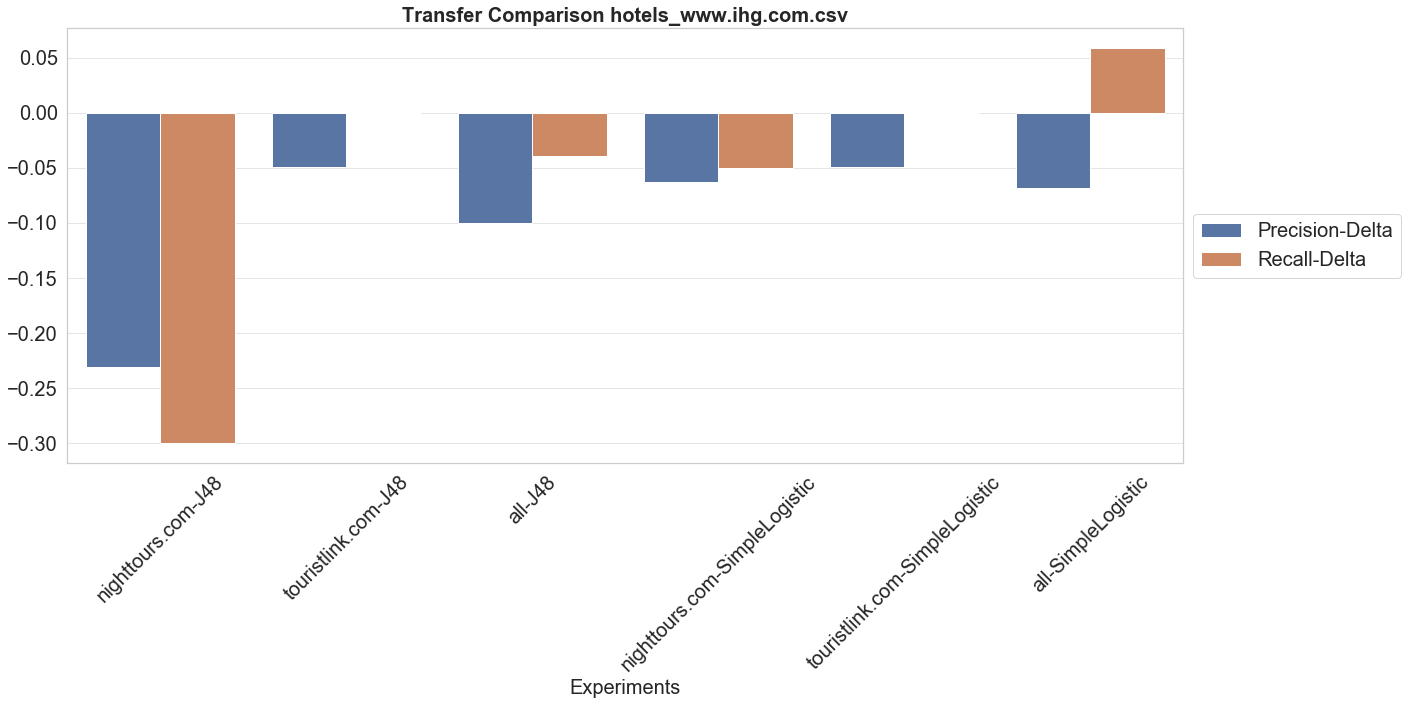

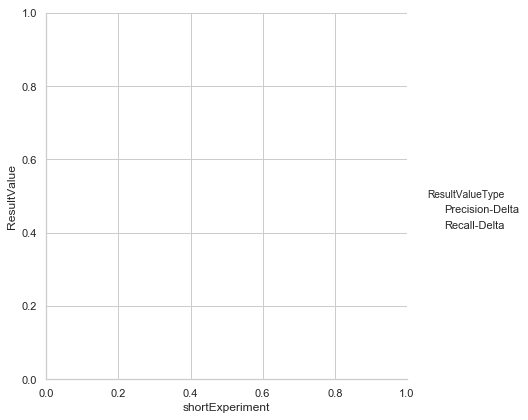

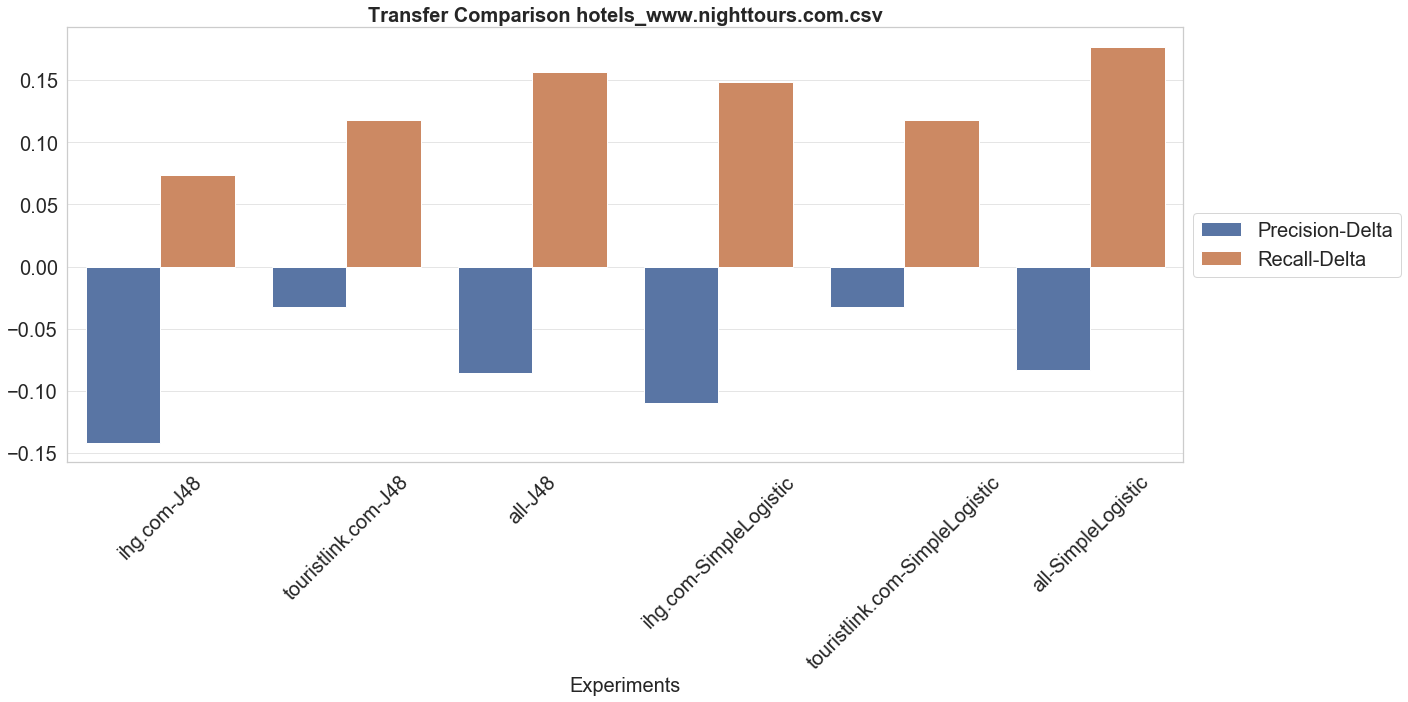

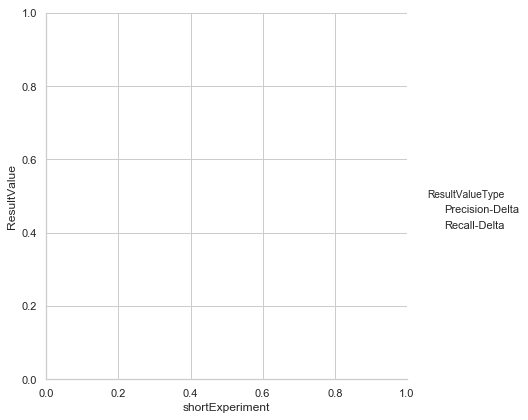

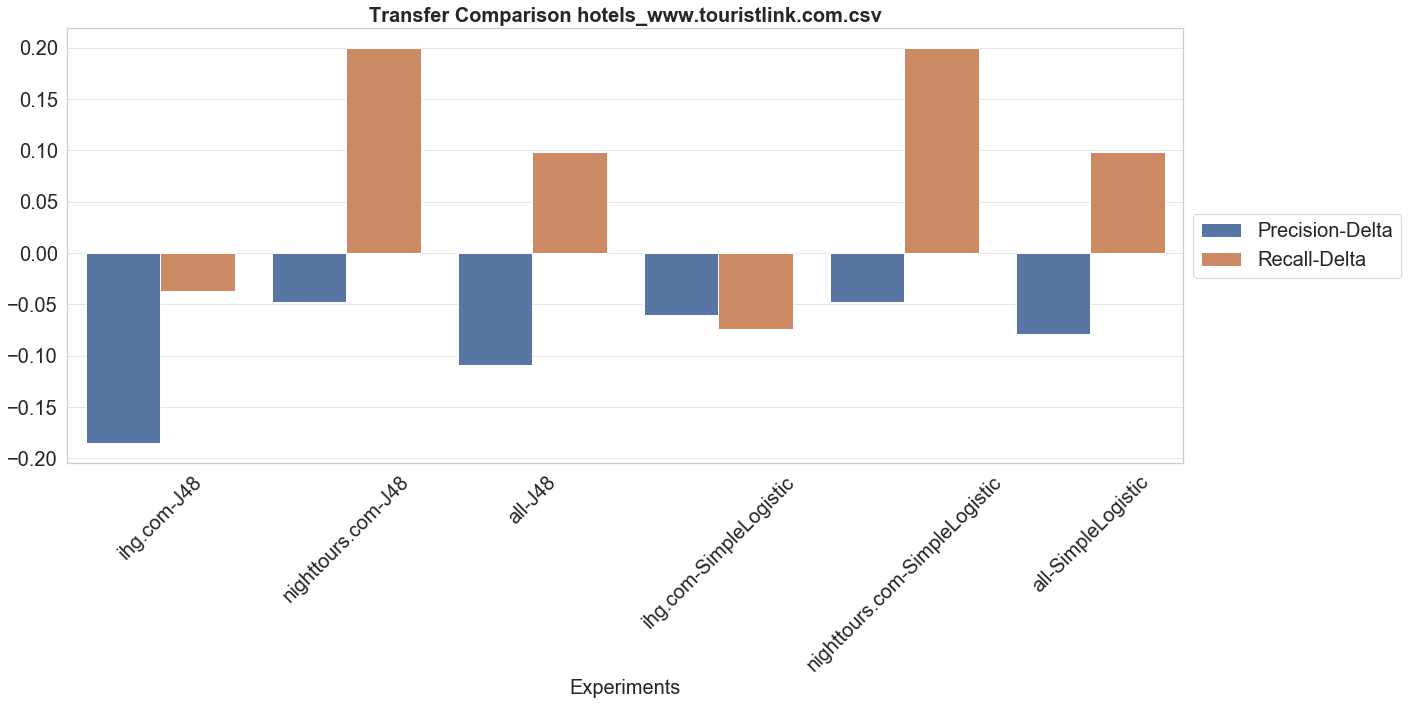

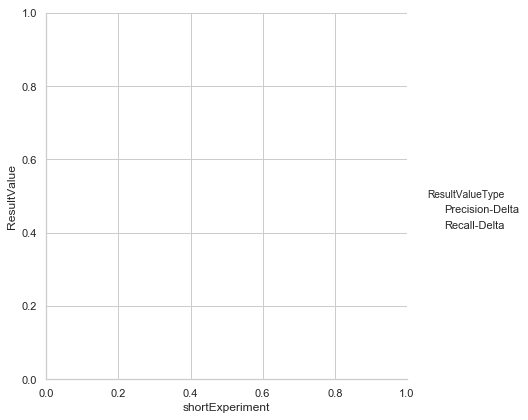

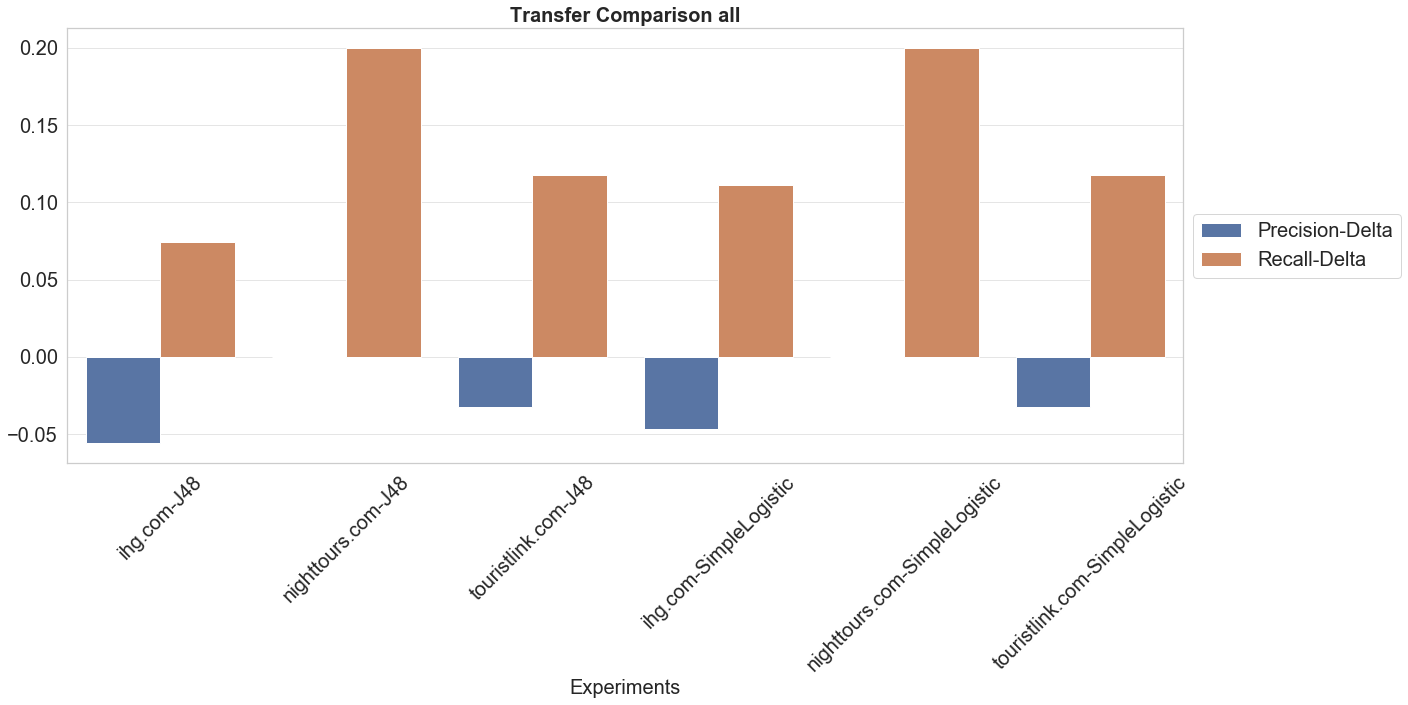

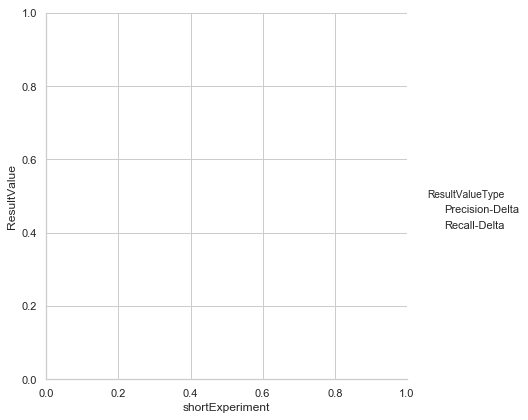

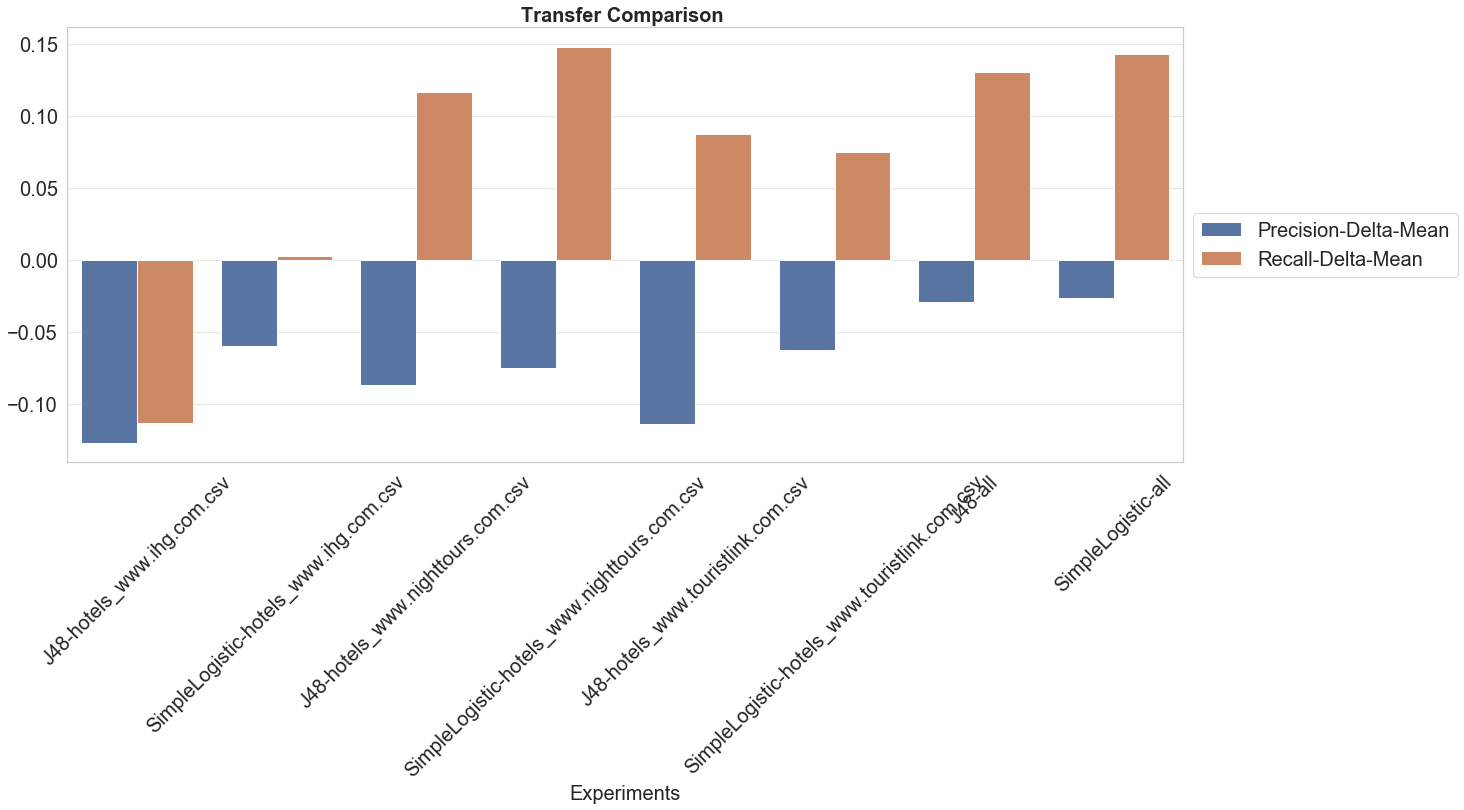

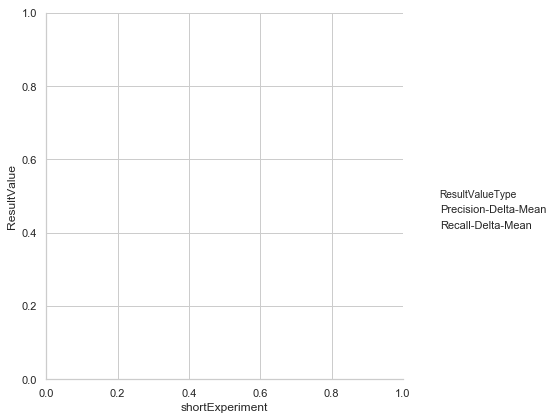

In [5]:
#Keep only transfer Experiments
dfExperimentsTransfer = dfExperiments[dfExperiments['Experiment'].str.contains('transfer_')]
dfExperimentsLearned = dfBestBaseline

dfMeanRulePerformance = pd.DataFrame()

display(dfExperimentsLearned)
for trainedOn in dfExperimentsTransfer['TrainedOn'].unique():
    dfTransferExperimentsTmpCompared = pd.DataFrame()
    
    dfSubSetExperimentsTransfer = dfExperimentsTransfer[dfExperimentsTransfer['TrainedOn'] == trainedOn]
    
    for indexTransfer, rowTransfer in dfSubSetExperimentsTransfer.iterrows():
        for indexLearned, rowLearned in dfExperimentsLearned.iterrows():
            if rowTransfer['TargetTable'] == rowLearned['TargetTable']:
                newRow = rowTransfer.copy()
                newRow['Precision-Delta'] = rowTransfer['Precision'] - rowLearned['Precision']
                newRow['Recall-Delta'] = rowTransfer['Recall'] - rowLearned['Recall']
                newRow['F-1-Delta'] = rowTransfer['F-1'] - rowLearned['F-1']
                newRow['Experiment'] = rowTransfer['Experiment']
            
                dfTransferExperimentsTmpCompared = dfTransferExperimentsTmpCompared.append(newRow, ignore_index=True)
     
    #display(dfTransferExperimentsTmpCompared)
    meanRulePerformance = {}
    for model in dfTransferExperimentsTmpCompared['TrainedModel']:
        subdfTransferExperimentsTmpCompared = dfTransferExperimentsTmpCompared[dfTransferExperimentsTmpCompared['TrainedModel'] == model]

        meanRulePerformance['shortExperiment'] = model + '-' + trainedOn
        meanRulePerformance['ResultValueType'] = 'Precision-Delta-Mean'
        meanRulePerformance['ResultValue'] = subdfTransferExperimentsTmpCompared['Precision-Delta'].mean()
        meanRulePerformance['MeanF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].mean()
        meanRulePerformance['StdF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].std()
        
        dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
        dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
        
        meanRulePerformance['shortExperiment'] = model + '-' + trainedOn
        meanRulePerformance['ResultValueType'] = 'Recall-Delta-Mean'
        meanRulePerformance['ResultValue'] = subdfTransferExperimentsTmpCompared['Recall-Delta'].mean()
        meanRulePerformance['MeanF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].mean()
        meanRulePerformance['StdF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].std()
        
        dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
        dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
    
    dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
    dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
    
    display(dfMeanPerfSingle)
    dfTransferExperimentsTmpComparedRearranged = rearrange(dfTransferExperimentsTmpCompared)
    dfTransferExperimentsTmpComparedRearranged['shortExperiment'] = dfTransferExperimentsTmpComparedRearranged['TargetTable'].str.replace('hotels_www.','').str.replace('.csv', '').str.cat(dfTransferExperimentsTmpComparedRearranged['TrainedModel'], sep='-')
    plotResults(dfTransferExperimentsTmpComparedRearranged, trainedOn)
    
plotResults(dfMeanRulePerformance, '')
display(round(dfMeanRulePerformance['MeanF1Delta'].mean(),4))
display(round(dfMeanRulePerformance['StdF1Delta'].mean(),4))

In [6]:
import csv
dfExperimentsTransferFiltered = dfExperimentsTransfer.filter(items=['Experiment','Precision', 'Recall', 'F-1', 'TargetTable', 'TrainedOn', 'TrainedModel'])
dfResultsRQ2 = pd.DataFrame()

for target in set(dfExperimentsTransferFiltered['TargetTable']):
    dfSubSeTransfertExperiments = dfExperimentsTransferFiltered[dfExperimentsTransferFiltered['TargetTable'] == target]
    dfSubBestBaseline = dfBestBaseline[dfBestBaseline['TargetTable'] == target]
    bestBaseline = dfSubBestBaseline.iloc[0]
    dfSubSeTransfertExperiments['F-1 Baseline'] = bestBaseline['F-1']
    dfSubSeTransfertExperiments['Precision Baseline'] = bestBaseline['Precision']
    dfSubSeTransfertExperiments['Recall Baseline'] = bestBaseline['Recall']
    dfSubSeTransfertExperiments['Best Baseline'] = bestBaseline['Experiment']
    dfSubSeTransfertExperiments['Delta F-1'] = dfSubSeTransfertExperiments['F-1'] - dfSubSeTransfertExperiments['F-1 Baseline']
    dfSubSeTransfertExperiments['Delta Precision'] = dfSubSeTransfertExperiments['Precision'] - dfSubSeTransfertExperiments['Precision Baseline']
    dfSubSeTransfertExperiments['Delta Recall'] = dfSubSeTransfertExperiments['Recall'] - dfSubSeTransfertExperiments['Recall Baseline']
    #dfSubSeTransfertExperiments['Delta Precision'] = bestBaseline['Precision'].subtract(dfSubSeTransfertExperiments['Precision Baseline'])
    #dfSubSeTransfertExperiments['Delta Recall'] = bestBaseline['Recall'].subtract(dfSubSeTransfertExperiments['Recall Baseline'])
    dfResultsRQ2 = dfResultsRQ2 .append(dfSubSeTransfertExperiments)

display(dfResultsRQ2)
dfResultsRQ2.to_csv('rq2_results_hotel.csv', sep=',', encoding='utf-8', index=False, quotechar='"', quoting=csv.QUOTE_ALL)

C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Experiment,Precision,Recall,F-1,TargetTable,TrainedOn,TrainedModel,F-1 Baseline,Precision Baseline,Recall Baseline,Best Baseline,Delta F-1,Delta Precision,Delta Recall
14,transfer_matchingRule_hotel-hotels_www.ihg.com...,0.833333,0.882353,0.857143,hotels_www.touristlink.com.csv,hotels_www.ihg.com.csv,J48,0.882353,0.882353,0.882353,baseline_bag_of_words_hotel-hotels_www.tourist...,-0.025210,-0.049020,0.000000
18,transfer_matchingRule_hotel-hotels_www.nightto...,0.850000,1.000000,0.918919,hotels_www.touristlink.com.csv,hotels_www.nighttours.com.csv,J48,0.882353,0.882353,0.882353,baseline_bag_of_words_hotel-hotels_www.tourist...,0.036566,-0.032353,0.117647
27,transfer_matchingRule_hotel-all,0.850000,1.000000,0.918919,hotels_www.touristlink.com.csv,all,J48,0.882353,0.882353,0.882353,baseline_bag_of_words_hotel-hotels_www.tourist...,0.036566,-0.032353,0.117647
30,transfer_matchingRule_hotel-hotels_www.ihg.com...,0.833333,0.882353,0.857143,hotels_www.touristlink.com.csv,hotels_www.ihg.com.csv,SimpleLogistic,0.882353,0.882353,0.882353,baseline_bag_of_words_hotel-hotels_www.tourist...,-0.025210,-0.049020,0.000000
34,transfer_matchingRule_hotel-hotels_www.nightto...,0.850000,1.000000,0.918919,hotels_www.touristlink.com.csv,hotels_www.nighttours.com.csv,SimpleLogistic,0.882353,0.882353,0.882353,baseline_bag_of_words_hotel-hotels_www.tourist...,0.036566,-0.032353,0.117647
43,transfer_matchingRule_hotel-all,0.850000,1.000000,0.918919,hotels_www.touristlink.com.csv,all,SimpleLogistic,0.882353,0.882353,0.882353,baseline_bag_of_words_hotel-hotels_www.tourist...,0.036566,-0.032353,0.117647
15,transfer_matchingRule_hotel-hotels_www.ihg.com...,0.833333,0.784314,0.808081,all,hotels_www.ihg.com.csv,J48,0.875000,0.933333,0.823529,baseline_label_hotel-all,-0.066919,-0.100000,-0.039216
19,transfer_matchingRule_hotel-hotels_www.nightto...,0.847458,0.980392,0.909091,all,hotels_www.nighttours.com.csv,J48,0.875000,0.933333,0.823529,baseline_label_hotel-all,0.034091,-0.085876,0.156863
23,transfer_matchingRule_hotel-hotels_www.tourist...,0.824561,0.921569,0.870370,all,hotels_www.touristlink.com.csv,J48,0.875000,0.933333,0.823529,baseline_label_hotel-all,-0.004630,-0.108772,0.098039
31,transfer_matchingRule_hotel-hotels_www.ihg.com...,0.865385,0.882353,0.873786,all,hotels_www.ihg.com.csv,SimpleLogistic,0.875000,0.933333,0.823529,baseline_label_hotel-all,-0.001214,-0.067949,0.058824


In [9]:
dfResultsRQ2 = dfResultsRQ2.sort_values(by=['TargetTable', 'TrainedOn', 'TrainedModel'])

dfResultsRQ2Filtered = dfResultsRQ2.filter(items=['TargetTable', 'TrainedOn', 'TrainedModel', 'Precision', 'Recall',  'F-1','Best Baseline','Delta Precision','Delta Recall','Delta F-1'])
dfResultsRQ2Filtered['Best Baseline'] = dfResultsRQ2Filtered['Best Baseline'].str.replace('baseline_', '').str.replace('_hotel', '')
dfResultsRQ2Filtered['Best Baseline'] = dfResultsRQ2Filtered['Best Baseline'].str.split('-', expand=True)[0]
dfResultsRQ2Filtered['TrainedModel'] = dfResultsRQ2Filtered['TrainedModel'].str.replace('J48', 'DT')
dfResultsRQ2Filtered['TrainedModel'] = dfResultsRQ2Filtered['TrainedModel'].str.replace('SimpleLogistic', 'LR')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('hotels_www.', '')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('.com', '')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('.csv', '')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('ihg', 'IHG')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('nighttours', 'NT')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('touristlink', 'TL')

dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('hotels_www.', '')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('.com', '')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('.csv', '')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('ihg', 'IHG')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('nighttours', 'NT')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('touristlink', 'TL')


dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('all', 'All')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('bag_of_words', 'BoW')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('linear_combination', 'LC')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('label', 'Label')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.round(3)


display(dfResultsRQ2Filtered)

print(dfResultsRQ2Filtered.to_latex(index=False))
dfResultsRQ2Filtered.to_csv('rq2_results_hotel.csv', sep=',', encoding='utf-8', index=False, quotechar='"', quoting=csv.QUOTE_ALL)

,TargetTable,TrainedOn,TrainedModel,Precision,Recall,F-1,Best Baseline,Delta Precision,Delta Recall,Delta F-1
15,All,IHG,DT,0.833,0.784,0.808,Label,-0.100,-0.039,-0.067
31,All,IHG,LR,0.865,0.882,0.874,Label,-0.068,0.059,-0.001
19,All,NT,DT,0.847,0.980,0.909,Label,-0.086,0.157,0.034
35,All,NT,LR,0.850,1.000,0.919,Label,-0.083,0.176,0.044
23,All,TL,DT,0.825,0.922,0.870,Label,-0.109,0.098,-0.005
39,All,TL,LR,0.855,0.922,0.887,Label,-0.079,0.098,0.012
25,IHG,All,DT,0.641,0.926,0.758,Label,-0.056,0.074,-0.009
41,IHG,All,LR,0.650,0.963,0.776,Label,-0.047,0.111,0.009
17,IHG,NT,DT,0.556,0.926,0.694,Label,-0.141,0.074,-0.072
33,IHG,NT,LR,0.587,1.000,0.740,Label,-0.110,0.148,-0.027


\begin{tabular}{lllrrrlrrr}
\toprule
TargetTable & TrainedOn & TrainedModel &  Precision &  Recall &    F-1 & Best Baseline &  Delta Precision &  Delta Recall &  Delta F-1 \\
\midrule
        All &       IHG &           DT &      0.833 &   0.784 &  0.808 &         Label &           -0.100 &        -0.039 &     -0.067 \\
        All &       IHG &           LR &      0.865 &   0.882 &  0.874 &         Label &           -0.068 &         0.059 &     -0.001 \\
        All &        NT &           DT &      0.847 &   0.980 &  0.909 &         Label &           -0.086 &         0.157 &      0.034 \\
        All &        NT &           LR &      0.850 &   1.000 &  0.919 &         Label &           -0.083 &         0.176 &      0.044 \\
        All &        TL &           DT &      0.825 &   0.922 &  0.870 &         Label &           -0.109 &         0.098 &     -0.005 \\
        All &        TL &           LR &      0.855 &   0.922 &  0.887 &         Label &           -0.079 &         0.098 &   

In [ ]:
import csv

dfExperimentsAll = dfResultsRQ2Filtered[dfResultsRQ2Filtered['TrainedOn'].str.contains('All')]
dfExperimentsOther = dfResultsRQ2Filtered[~dfResultsRQ2Filtered['TrainedOn'].str.contains('All')]

dfAggregatedExperiments = dfExperimentsOther.groupby(['Indexing Threshold']).mean()
dfAggregatedExperiments['Level'] = 'Other'
dfAggregatedExperimentsAll = dfExperimentsAll.groupby(['Indexing Threshold']).mean()
dfAggregatedExperimentsAll['Level'] = 'All'

dfAggregatedExperiments = dfAggregatedExperiments.append(dfAggregatedExperimentsAll)
display(dfAggregatedExperiments)
dfAggregatedExperiments.to_csv('rq1_aggregated_results_hotel.csv', sep=',', encoding='utf-8', quotechar='"', quoting=csv.QUOTE_ALL)